
<img src="https://devra.ai/analyst/notebook/3175/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Job Market Insights and Salary Prediction Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://www.linkedin.com/in/eng-mostafa-ali-66b3a7352/" style="color:#6666FF">eng-mostafa-ali</a></div>
</div>

Exploring the multifaceted job dataset, one cannot help but appreciate that a data scientist's world can be as volatile as the job market itself. If you find the insights and the predictor useful, please upvote.

## Table of Contents

- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion and Further Work](#Conclusion-and-Further-Work)

In [31]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a seaborn style
sns.set(style='whitegrid')


## Introduction

In this notebook, we explore the jobs dataset that provides comprehensive details about job listings including location, company, contract type, salary information, and more. Our curiosity is piqued not only by the variety in job postings but also by the potential to predict a job's median salary using available features. The methods and visualizations provided here are meant to assist you in uncovering insights that could influence your next career decision or guide your recruiting strategy.

Let's dive in.

## Data Loading

In this section we load the data file located at `/kaggle/input/jobs-a-2025-dataset/dfall_clean.csv`. We assume the file is in the same directory as this notebook.

In [32]:
# Load the dataset
df = pd.read_csv('dfall_clean.csv')

df.head()

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,permanent,full_time,40518.74,40518.74,40518.74,1,2025-09-22 09:28:13+00:00,2025-09-22,https://www.adzuna.co.uk/jobs/details/54104746...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxMDQ3NDYwOSIsI...
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,permanent,full_time,64000.00,64000.00,64000.00,0,2025-09-03 21:20:59+00:00,2025-09-03,https://www.adzuna.co.uk/jobs/details/53815190...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTM4MTUxOTAxMSIsI...
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,permanent,part_time,13.00,13.00,13.00,0,2025-09-08 15:49:25+00:00,2025-09-08,https://www.adzuna.co.uk/jobs/details/53893713...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,26707.00,29494.00,28100.50,0,2025-09-17 15:00:12+00:00,2025-09-17,https://www.adzuna.co.uk/jobs/details/54030979...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQwMzA5Nzk4NSIsI...
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,80000.00,NaN,80000.00,0,2025-09-15 17:51:23+00:00,2025-09-15,https://www.adzuna.co.uk/jobs/details/54003061...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...


## Data Cleaning and Preprocessing

This section details our process of checking the data types, handling missing values, and formatting the date columns.

Note: The dataset contains date information in the columns `created_dt` and `created_date`. If these columns are not already in datetime format, we convert them.

In [33]:
# Checking initial data types
print('Original data types:')
print(df.dtypes)

# Convert date columns from string to datetime if necessary
for col in ['created_dt', 'created_date']:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"Converted {col} to datetime")
        except Exception as e:
            print(f"Error converting {col}:", e)

# Check for missing values
print('\nMissing values per column:')
print(df.isna().sum())

# An example of handling missing values: here, we drop rows with missing salary_mid
df = df.dropna(subset=['salary_mid'])
print('\nShape after dropping rows with missing salary_mid:', df.shape)

Original data types:
id                       int64
title                   object
company_name            object
category_label          object
category_tag            object
country                 object
location_display        object
location_area           object
latitude               float64
longitude              float64
contract_type           object
contract_time           object
salary_min             float64
salary_max             float64
salary_mid             float64
salary_is_predicted      int64
created_dt              object
created_date            object
redirect_url            object
adref                   object
dtype: object
Converted created_dt to datetime
Converted created_date to datetime

Missing values per column:
id                        0
title                     0
company_name            214
category_label            0
category_tag              0
country                   0
location_display          0
location_area             0
latitude                7

## Exploratory Data Analysis

We now explore the dataset through various visualizations. We begin by examining numeric columns and visualizing their distributions, correlations and key categorical counts.

Below are different plots to give us an insight into the job data.

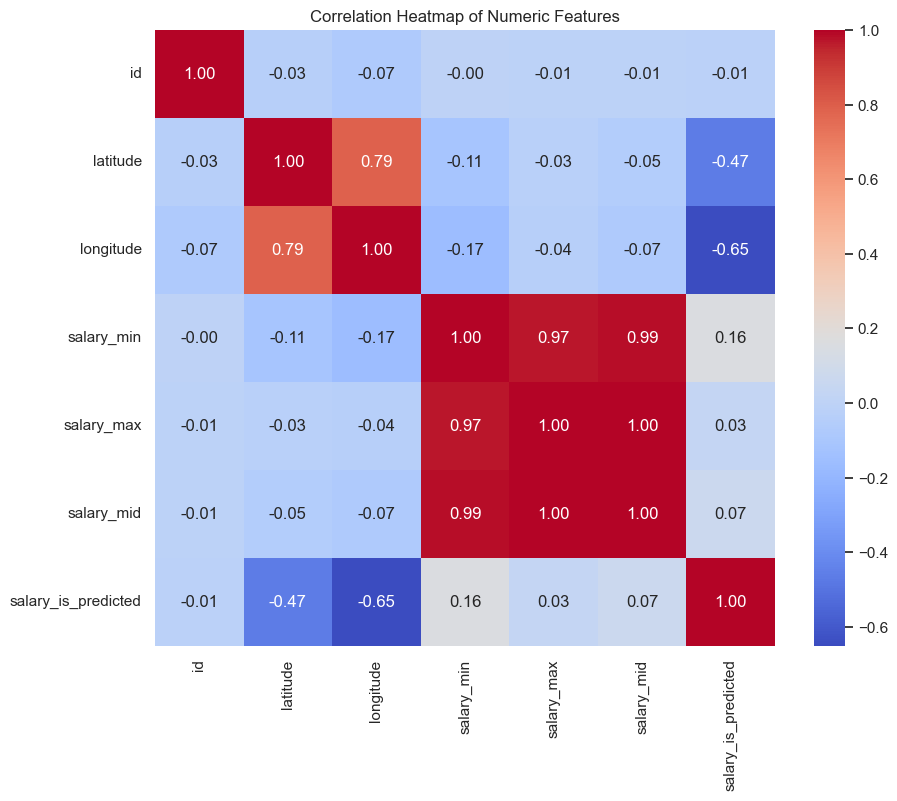

In [34]:
# Create a numeric dataframe for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to plot a correlation heatmap.')

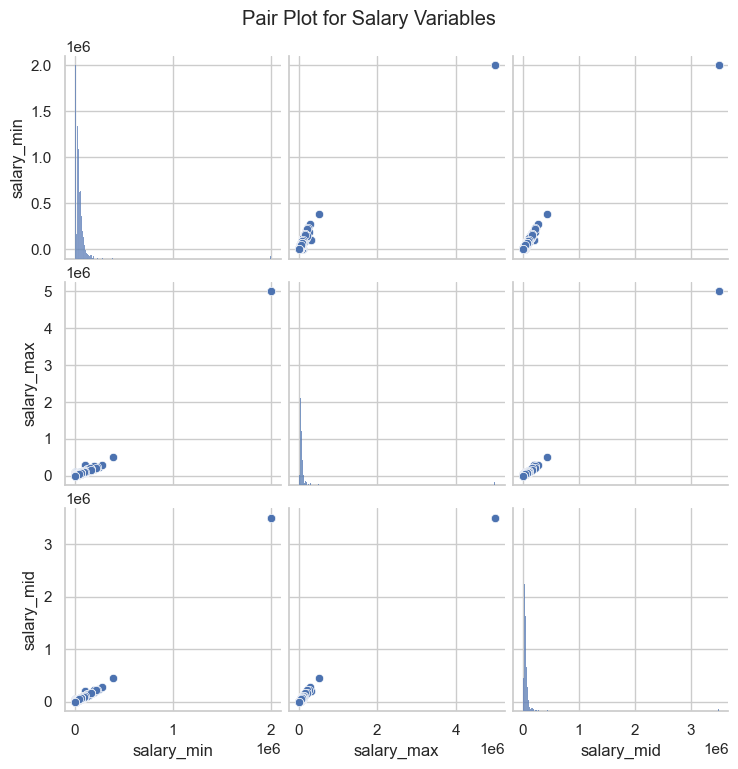

In [35]:
# Pair plot for some salary related variables
sns.pairplot(df[['salary_min', 'salary_max', 'salary_mid']])
plt.suptitle('Pair Plot for Salary Variables', y=1.02)
plt.show()

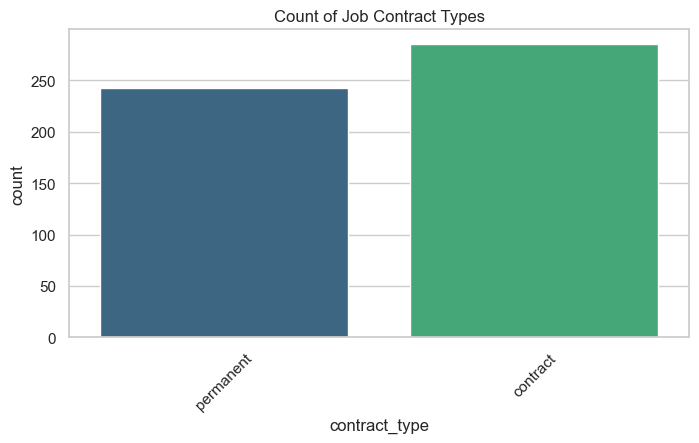

In [36]:
# Visualize the distribution of contract types
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='contract_type', palette='viridis')
plt.title('Count of Job Contract Types')
plt.xticks(rotation=45)
plt.show()

## Predictive Modeling

In this section, we build a linear regression model to predict the median salary (`salary_mid`) based on selected features. The rationale is simple: In a volatile job market, having a predictive edge can be as useful as a well-tailored resume.

### Feature Selection and Engineering

We select a subset of features that we believe could have predictive power. These include categorical features such as `country`, `contract_type`, and `category_label`. We use one-hot encoding to transform these categorical variables into dummy variables.

We then split the data into training and testing sets for evaluation using metrics like R2 score and RMSE.

Model Evaluation Metrics:
Root Mean Squared Error: 45367.98891706507
R2 Score: 0.9816562971916585


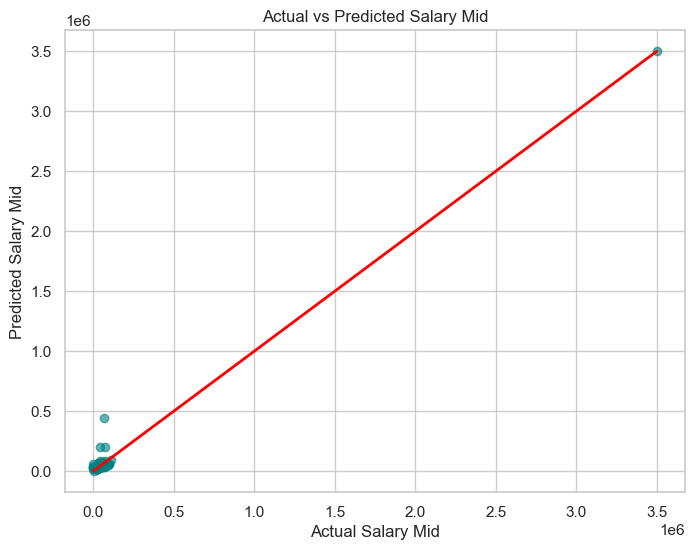

In [38]:
# Select a subset of features for the prediction
features = ['country', 'contract_type', 'category_label']

# Ensure that we have no missing values for these features
df_model = df.dropna(subset=features + ['salary_mid']).copy()

# One-hot encode the categorical variables
df_model_encoded = pd.get_dummies(df_model[features], drop_first=True)

# Combine with the target variable
X = df_model_encoded
y = df_model['salary_mid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model Evaluation Metrics:')
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel('Actual Salary Mid')
plt.ylabel('Predicted Salary Mid')
plt.title('Actual vs Predicted Salary Mid')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal fit line
plt.show()


## Conclusion and Further Work

In this notebook, we explored a diverse job dataset using several data visualization techniques including heatmaps, pair plots, and count plots. We addressed potential data pitfalls such as improper date formats and missing values. The linear regression model built here provides a basic yet insightful predictor for the median salary based on factors like country, contract type, and job category.

Merits of our Approach:

- Comprehensive data cleaning to ensure the dates are correctly parsed and missing key values are addressed.
- Multiple visualization methods highlight the distributions and correlations in our data.
- A simple predictive model that can serve as a baseline for further complex models.

Ideas for Future Analysis:

- Explore additional features like location details (latitude and longitude) or more granular job titles to improve model accuracy.
- Experiment with more complex models such as Random Forests or Gradient Boosting Machines for salary prediction.
- Perform hyperparameter tuning and cross-validation to enhance model performance.

If you find this notebook useful, an upvote is much appreciated.